## **EVALUACIÓN MODELOS**
El dataset utilizado no contiene una gran cantidad de datos ya que se realizar exclusivamente de la zona de Churriana, Málaga y además nuestro modelo de scrapeo web termina bloqueando la extracción de datos y no nos permite obtener todos los datos de la zona disponibles.

Se aplican diferentes modelos para ver cual de ellos presenta el mejor comportamiento a la hora de predecir el precio:
* Regresión Lineal
* Regresión Bridge
* SVM-Support Vector Machine
* XgBoost Regresion
* Gradient Boosting Regressor
* Arbol de Regresión

### **Importamos las librerías necesarias:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
file_path = "../data/data_model_churriana_malaga.csv"
data = pd.read_csv(file_path, index_col = 0)

In [3]:
data.head()

,latitude,longitude,price,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,...,is_goog_condition,a,b,c,d,e,f,g,inProcess,unknown
0,36.666638,-4.464576,395000,4,3,1.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,36.663719,-4.503897,640000,4,2,1.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
2,36.656894,-4.502930,567000,5,4,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,0,0,0,1,0
3,36.671190,-4.516900,375900,4,2,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
4,36.671190,-4.516900,249900,2,2,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


#### **Tabla para evaluación de los modelos**<br>
Creamos una tabla vacía con las siguientes columnas: 'Modelo', 'Detalles', 'R2 train', 'R2 test', 'MAE train' y 'MAE test'.
Aquí iremos agregando los resultados de cada modelo para finalmente de un simple vistazo poder comparar los rendimientos que aportan y quedarnos con uno de ellos.

In [4]:
resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

Definimos dos funciones que nos ayudarán a evaluar posteriormente el rendimiento de los modelos.

In [5]:
def error_absoluto_medio(y,y_pred):
    v = np.abs(y - y_pred)
    return v.sum()/len(y)
    
def error_gen(y_train,y_pred_train,y_test,y_pred_test):
    MAE_TRAIN = error_absoluto_medio(y_train,y_pred_train)
    MAE_TEST = error_absoluto_medio(y_test,y_pred_test)
    return MAE_TRAIN,MAE_TEST

#### **Variable objetivo y features**

In [6]:
target= 'price'

In [7]:
x = data.drop(target,axis=1)
y = data[target]    

#### **Dividimos el conjunto de datos en train y test**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
test_size = 0.2

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size)

#### **Regresión lineal**

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#Definimos una función para aplicar regresiones lineales. 
def regresion_lineal(data,test_size=0.2,target=target):
    #definimos las variables den entrada y salida.
    
  
    #definimos la instancia
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    
    #metricas de evaluación
    r2_train = lr.score(x_train,y_train)
    r2_test = lr.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    #aplicamos el modelo
    y_train_pred = lr.predict(x_train)
    y_test_pred = lr.predict(x_test)

    
    MAE_train = error_absoluto_medio(y_train,y_train_pred)
    
    MAE_test = error_absoluto_medio(y_test,y_test_pred)
    
    return r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred


r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred = regresion_lineal(data)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8041,0.7747,123643.146028,117666.279863


### **Regresión Ridge**

In [13]:
from sklearn.linear_model import Ridge

def regresion_ridge(data):
    
        
    rd = Ridge(alpha=100)    
    rd.fit(x_train,y_train)
    
    r2_train = rd.score(x_train,y_train)
    r2_test = rd.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    y_train_pred = rd.predict(x_train)
    y_test_pred = rd.predict(x_test)
    
    MAE_train,MAE_test = error_gen(y_train,y_train_pred,y_test,y_test_pred)
    

    return r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred

r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred = regresion_ridge(data)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Bridge','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8041,0.7747,123643.146028,117666.279863
1,Regresión Bridge,Sin procesar,0.7683,0.8562,117549.242417,83721.036403


El modelo de regresión lineal presenta mejores resultados que el modelo bridge.
<br>
Veamos otros tipos de modelos a comparar.

### **SVM-Support Vector Machine**


In [14]:
from sklearn.svm import SVR

def svm_support(data, kernel='rbf'):

    svm = SVR(kernel=kernel)
    svm.fit(x_train,y_train)
    
    r2_train = svm.score(x_train,y_train)
    r2_test = svm.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    y_train_pred = svm.predict(x_train)
    y_test_pred = svm.predict(x_test)
    
    MAE_train = error_absoluto_medio(y_train,y_train_pred)
    MAE_test = error_absoluto_medio(y_test,y_test_pred)
    
    return r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred = svm_support(data,kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = [f"SVM {kernel}","Sin procesar",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8041,0.7747,123643.146028,117666.279863
1,Regresión Bridge,Sin procesar,0.7683,0.8562,117549.242417,83721.036403
2,SVM linear,Sin procesar,0.7421,0.8068,120198.607420,99590.164368
3,SVM poly,Sin procesar,-0.0842,-0.1735,253269.512448,233222.452440
4,SVM rbf,Sin procesar,-0.1093,-0.1769,254900.067625,233479.565835
5,SVM sigmoid,Sin procesar,-0.1093,-0.1770,254906.300755,233485.497632


Este modelo presenta los mejores resultados para el parámetro "linear", el resto no ajusta bien el modelo.

### **XGBoost**

In [15]:
!pip install xgboost

In [16]:
import xgboost as xgb

def xgboost_regresion(data):
    
        
    xgbr = xgb.XGBRegressor()    
    xgbr.fit(x_train,y_train)
    
    r2_train = xgbr.score(x_train,y_train)
    r2_test = xgbr.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    y_train_pred = xgbr.predict(x_train)
    y_test_pred = xgbr.predict(x_test)
    
    MAE_train,MAE_test = error_gen(y_train,y_train_pred,y_test,y_test_pred)
    

    return r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred

r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred = xgboost_regresion(data)
final = resultados.shape[0]
resultados.loc[final] = ['xgboost Regresion','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8041,0.7747,123643.146028,117666.279863
1,Regresión Bridge,Sin procesar,0.7683,0.8562,117549.242417,83721.036403
2,SVM linear,Sin procesar,0.7421,0.8068,120198.607420,99590.164368
3,SVM poly,Sin procesar,-0.0842,-0.1735,253269.512448,233222.452440
4,SVM rbf,Sin procesar,-0.1093,-0.1769,254900.067625,233479.565835
5,SVM sigmoid,Sin procesar,-0.1093,-0.1770,254906.300755,233485.497632
6,xgboost Regresion,Sin procesar,1.0000,0.6262,215.681863,111168.805099


### **Gradient Boosting Regressor**

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
def gb_regresion(data):
    
        
    gb = GradientBoostingRegressor()    
    gb.fit(x_train,y_train)
    
    r2_train = gb.score(x_train,y_train)
    r2_test = gb.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    y_train_pred = gb.predict(x_train)
    y_test_pred = gb.predict(x_test)
    
    MAE_train,MAE_test = error_gen(y_train,y_train_pred,y_test,y_test_pred)
    

    return r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred

r2_train,r2_test,MAE_train,MAE_test,y_train_pred,y_test_pred = gb_regresion(data)
final = resultados.shape[0]
resultados.loc[final] = ['Gradient Boosting Regressor','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8041,0.7747,123643.146028,117666.279863
1,Regresión Bridge,Sin procesar,0.7683,0.8562,117549.242417,83721.036403
2,SVM linear,Sin procesar,0.7421,0.8068,120198.607420,99590.164368
3,SVM poly,Sin procesar,-0.0842,-0.1735,253269.512448,233222.452440
4,SVM rbf,Sin procesar,-0.1093,-0.1769,254900.067625,233479.565835
5,SVM sigmoid,Sin procesar,-0.1093,-0.1770,254906.300755,233485.497632
6,xgboost Regresion,Sin procesar,1.0000,0.6262,215.681863,111168.805099
7,Gradient Boosting Regressor,Sin procesar,0.9975,0.0907,20749.134364,140413.435564


### **Random Forest Regressor**

In [19]:
from sklearn.tree import DecisionTreeRegressor

def Arbol_Regresion(data):
    
    tree = DecisionTreeRegressor(min_samples_split=30,min_samples_leaf=10,random_state=0)
    tree.fit(x_train,y_train)
    
    r2_train = tree.score(x_train,y_train)
    r2_test = tree.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    y_train_pred = tree.predict(x_train)
    y_test_pred = tree.predict(x_test)
    
    MAE_train,MAE_test = error_gen(y_train,y_train_pred,y_test,y_test_pred)
    
    return r2_train,r2_test, MAE_train,MAE_test,y_train_pred,y_test_pred

In [20]:
r2_train,r2_test, MAE_train,MAE_test,y_train_pred,y_test_pred = Arbol_Regresion(data)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Sin procesar',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.8041,0.7747,123643.146028,117666.279863
1,Regresión Bridge,Sin procesar,0.7683,0.8562,117549.242417,83721.036403
2,SVM linear,Sin procesar,0.7421,0.8068,120198.607420,99590.164368
3,SVM poly,Sin procesar,-0.0842,-0.1735,253269.512448,233222.452440
4,SVM rbf,Sin procesar,-0.1093,-0.1769,254900.067625,233479.565835
5,SVM sigmoid,Sin procesar,-0.1093,-0.1770,254906.300755,233485.497632
6,xgboost Regresion,Sin procesar,1.0000,0.6262,215.681863,111168.805099
7,Gradient Boosting Regressor,Sin procesar,0.9975,0.0907,20749.134364,140413.435564
8,Árbol de regresión,Sin procesar,0.6379,0.4750,116129.563747,132443.545758


### **Valoración de resultados modelos**

Los modelos que han presentado mejor rendimientos han sido Regresion Bridge, SVM y Linear Regresor. En el siguiente nootebook trabajaremos ambos modelos para ver si conseguimos mejorar su rendimiento y quedarnos con el que mejores resultaods aporte para generar nuestro dataset final con la columna precio predicho, variación del precio predicho con el precio real y sacar su porcentaje de rentabilidad. Estos datos serán los que usaremos para la parte de viualización front end.

In [21]:
resultados['R2 test'] = resultados['R2 test'].astype(float)

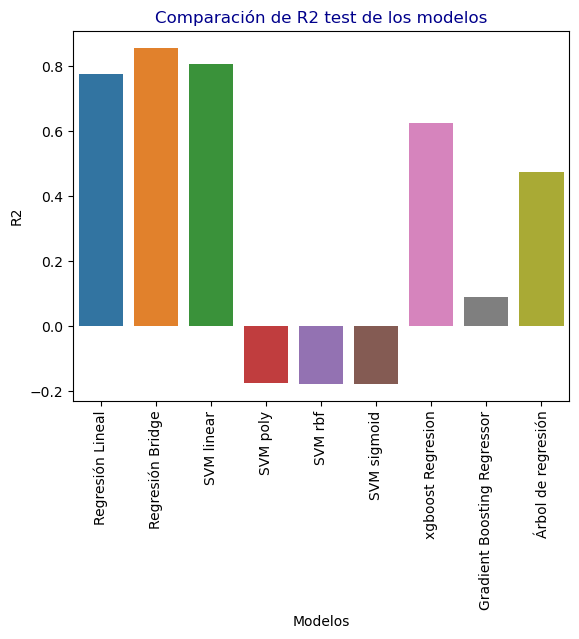

In [22]:
sns.barplot(x='Modelo', y='R2 test', data=resultados)

# Añade título y etiquetas de eje
plt.title('Comparación de R2 test de los modelos', color='darkblue')
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.xticks(rotation=90)

# Muestra el gráfico
plt.savefig("../graficas/comparacion_r2test_modelos")
plt.show()

Guardamos la tabla de evaluaciones obtenida:

In [23]:
resultados.to_csv('../data/tabla_resultados_evaluaciones_modelos.csv', index=False)